# 1. 워드 임베딩(Word Embedding)

워드 임베딩(Word Embedding)은 단어를 벡터로 표현하는 방법으로, 단어를 밀집 표현으로 변환합니다. 이번 챕터에서는 희소 표현, 밀집 표현, 그리고 워드 임베딩에 대한 개념을 이해합니다.

## 1.1 희소 표현(Sparse Representation)


앞서 원-핫 인코딩을 통해서 나온 원-핫 벡터들은 표현하고자 하는 단어의 인덱스의 값만 1이고, 나머지 인덱스에는 전부 0으로 표현되는 벡터 표현 방법이었습니다. 이렇게 벡터 또는 행렬(matrix)의 값이 대부분이 0으로 표현되는 방법을 희소 표현(sparse representation)이라고 합니다. 그러니까 원-핫 벡터는 희소 벡터(sparse vector)입니다.  

이러한 희소 벡터의 문제점은 단어의 개수가 늘어나면 벡터의 차원이 한없이 커진다는 점입니다. 원-핫 벡터로 표현할 때는 갖고 있는 코퍼스에 단어가 10,000개였다면 벡터의 차원은 10,000이어야만 했습니다. 심지어 그 중에서 단어의 인덱스에 해당되는 부분만 1이고 나머지는 0의 값을 가져야만 했습니다. 단어 집합이 클수록 고차원의 벡터가 됩니다. 예를 들어 단어가 10,000개 있고 강아지란 단어의 인덱스는 5였다면 원 핫 벡터는 이렇게 표현되어야 했습니다.    

Ex) 강아지 = [ 0 0 0 0 1 0 0 0 0 0 0 0 ... 중략 ... 0] # 이 때 1 뒤의 0의 수는 9995개.  

이러한 벡터 표현은 공간적 낭비를 불러일으킵니다. 잘 생각해보면, 공간적 낭비를 일으키는 것은 원-핫 벡터뿐만은 아닙니다. 희소 표현의 일종인 DTM과 같은 경우에도 특정 문서에 여러 단어가 다수 등장하였으나, 다른 많은 문서에서는 해당 특정 문서에 등장했던 단어들이 전부 등장하지 않는다면 역시나 행렬의 많은 값이 0이 되면서 공간적 낭비를 일으킵니다. 뿐만 아니라, 원-핫 벡터는 단어의 의미를 담지 못한다는 단점을 갖고있습니다.

## 1.2 밀집 표현(Dense Representation)

이러한 희소 표현과 반대되는 표현이 있으니, 이를 밀집 표현(dense representation)이라고 합니다. 밀집 표현은 벡터의 차원을 단어 집합의 크기로 상정하지 않습니다. 사용자가 설정한 값으로 모든 단어의 벡터 표현의 차원을 맞춥니다. 또한, 이 과정에서 더 이상 0과 1만 가진 값이 아니라 실수값을 가지게 됩니다. 다시 희소 표현의 예를 가져와봅시다.

Ex) 강아지 = [ 0 0 0 0 1 0 0 0 0 0 0 0 ... 중략 ... 0] # 이 때 1 뒤의 0의 수는 9995개. 차원은 10,000

예를 들어 10,000개의 단어가 있을 때 강아지란 단어를 표현하기 위해서는 위와 같은 표현을 사용했습니다. 하지만 밀집 표현을 사용하고, 사용자가 밀집 표현의 차원을 128로 설정한다면, 모든 단어의 벡터 표현의 차원은 128로 바뀌면서 모든 값이 실수가 됩니다.

Ex) 강아지 = [0.2 1.8 1.1 -2.1 1.1 2.8 ... 중략 ...] # 이 벡터의 차원은 128

이 경우 벡터의 차원이 조밀해졌다고 하여 밀집 벡터(dense vector)라고 합니다.

## 1.3 워드 임베딩(Word Embedding)

단어를 밀집 벡터(dense vector)의 형태로 표현하는 방법을 워드 임베딩(word embedding)이라고 합니다. 그리고 이 밀집 벡터를 워드 임베딩 과정을 통해 나온 결과라고 하여 임베딩 벡터(embedding vector)라고도 합니다.

워드 임베딩 방법론으로는 LSA, Word2Vec, FastText, Glove 등이 있습니다. 케라스에서 제공하는 도구인 Embedding()는 앞서 언급한 방법들을 사용하지는 않지만, 단어를 랜덤한 값을 가지는 밀집 벡터로 변환한 뒤에, 인공 신경망의 가중치를 학습하는 것과 같은 방식으로 단어 벡터를 학습하는 방법을 사용합니다. 아래의 표는 앞서 배운 원-핫 벡터와 지금 배우고 있는 임베딩 벡터의 차이를 보여줍니다.


	원-핫 벡터	임베딩 벡터  
차원	고차원(단어 집합의 크기)	저차원  
다른 표현	희소 벡터의 일종	밀집 벡터의 일종  
표현 방법	수동	훈련 데이터로부터 학습함  
값의 타입	1과 0	실수  

https://colah.github.io/posts/2014-07-NLP-RNNs-Representations/  
https://www.kakaobrain.com/blog/6

# 2. 워드 투 벡터(word2vec)

앞서 원-핫 인코딩 챕터에서 원-핫 벡터는 단어 간 유사도를 계산할 수 없다는 단점이 있음을 언급한 적이 있습니다. 그래서 단어 간 유사도를 반영할 수 있도록 단어의 의미를 벡터화 할 수 있는 방법이 필요합니다. 그리고 이를 위해서 사용되는 대표적인 방법이 워드투벡터(Word2Vec)입니다. Word2Vec의 개념을 설명하기에 앞서, Word2Vec가 어떤 일을 할 수 있는지 먼저 확인해보겠습니다.

![python_image2](https://wikidocs.net/images/page/22660/word2vec.PNG)

http://w.elnn.kr/search/

위 사이트는 한국어 단어에 대해서 벡터 연산을 해볼 수 있는 사이트입니다. 위 사이트에서는 단어들(실제로는 Word2Vec 벡터)로 더하기, 빼기 연산을 할 수 있습니다. 예를 들어 아래의 식에서 좌변을 집어 넣으면, 우변의 답들이 나옵니다.

고양이 + 애교 = 강아지
한국 - 서울 + 도쿄 = 일본
박찬호 - 야구 + 축구 = 호나우두

신기하게도 단어가 가지고 있는 어떤 의미들을 가지고 연산을 하고 있는 것처럼 보입니다. 이런 연산이 가능한 이유는 각 단어 벡터가 단어 간 유사도를 반영한 값을 가지고 있기 때문입니다. 어떻게 이런 일이 가능한 것일까요?

## 2.1 희소 표현(Sparse Representation)
앞서 원-핫 인코딩을 통해서 나온 원-핫 벡터들은 표현하고자 하는 단어의 인덱스의 값만 1이고, 나머지 인덱스에는 전부 0으로 표현되는 벡터 표현 방법이었습니다. 이렇게 벡터 또는 행렬(matrix)의 값이 대부분이 0으로 표현되는 방법을 희소 표현(sparse representation)이라고 합니다. 그러니까 원-핫 벡터는 희소 벡터(sparse vector)입니다.

하지만 이러한 표현 방법은 각 단어간 유사성을 표현할 수 없다는 단점이 있었고, 이를 위한 대안으로 단어의 '의미'를 다차원 공간에 벡터화하는 방법을 찾게되는데, 이러한 표현 방법을 분산 표현(distributed representation)이라고 합니다. 그리고 이렇게 분산 표현을 이용하여 단어의 유사도를 벡터화하는 작업은 워드 임베딩(embedding) 작업에 속하기 때문에 이렇게 표현된 벡터 또한 임베딩 벡터(embedding vector)라고 하며, 저차원을 가지므로 바로 앞의 챕터에서 배운 밀집 벡터(dense vector)에도 속합니다.

## 2.2 분산 표현(Distributed Representation)
분산 표현(distributed representation) 방법은 기본적으로 분포 가설(distributional hypothesis)이라는 가정 하에 만들어진 표현 방법입니다. 이 가정은 **'비슷한 위치에서 등장하는 단어들은 비슷한 의미를 가진다'**라는 가정입니다. 강아지란 단어는 귀엽다, 예쁘다, 애교 등의 단어가 주로 함께 등장하는데 분포 가설에 따라서 저런 내용을 가진 텍스트를 벡터화한다면 저 단어들은 의미적으로 가까운 단어가 됩니다. 분산 표현은 분포 가설을 이용하여 단어들의 셋을 학습하고, 벡터에 단어의 의미를 여러 차원에 분산하여 표현합니다.

이렇게 표현된 벡터들은 원-핫 벡터처럼 벡터의 차원이 단어 집합(vocabulary)의 크기일 필요가 없으므로, 벡터의 차원이 상대적으로 저차원으로 줄어듭니다. 예를 들어 단어가 10,000개 있고 인덱스가 1부터 시작한다고 하였을 때 강아지란 단어의 인덱스는 5였다면 강아지란 단어를 표현하는 원-핫 벡터는 다음과 같았습니다.

Ex) 강아지 = [ 0 0 0 0 1 0 0 0 0 0 0 0 ... 중략 ... 0]

1이란 값 뒤에는 0이 9,995개가 있는 벡터가 됩니다. 하지만 Word2Vec로 임베딩 된 벡터는 굳이 벡터의 차원이 단어 집합의 크기가 될 필요가 없습니다. 강아지란 단어를 표현하기 위해 사용자가 설정한 차원을 가지는 벡터가 되면서 각 차원은 실수형의 값을 가집니다.

Ex) 강아지 = [0.2 0.3 0.5 0.7 0.2 ... 중략 ... 0.2]

요약하면 희소 표현이 고차원에 각 차원이 분리된 표현 방법이었다면, 분산 표현은 저차원에 **단어의 의미를 여러 차원에다가 분산하여 표현**합니다. 이런 표현 방법을 사용하면 단어 간 유사도를 계산할 수 있습니다.

이를 위한 학습 방법으로는 NNLM, RNNLM 등이 있으나 요즘에는 해당 방법들의 속도를 대폭 개선시킨 **Word2Vec**가 많이 쓰이고 있습니다.

## 2.3. CBOW(Continuous Bag of Words)
Word2Vec에는 CBOW(Continuous Bag of Words)와 Skip-Gram 두 가지 방식이 있습니다. **CBOW는 주변에 있는 단어들을 가지고, 중간에 있는 단어들을 예측하는 방법**입니다. 반대로, **Skip-Gram은 중간에 있는 단어로 주변 단어들을 예측하는 방법**입니다. 메커니즘 자체는 거의 동일하기 때문에 CBOW를 이해한다면 Skip-Gram도 손쉽게 이해 가능합니다. 우선 CBOW에 대해서 알아보도록 하겠습니다. 이해를 위해 매우 간소화 된 형태의 CBOW로 설명합니다.

예문 : "The fat cat sat on the mat"
예를 들어서 갖고 있는 코퍼스에 위와 같은 문장이 있다고 합시다. 가운데 단어를 예측하는 것이 CBOW라고 했습니다. {"The", "fat", "cat", "on", "the", "mat"}으로부터 sat을 예측하는 것은 CBOW가 하는 일입니다. 이 때 예측해야하는 단어 sat을 중심 단어(center word)라고 하고, 예측에 사용되는 단어들을 주변 단어(context word)라고 합니다.

중심 단어를 예측하기 위해서 앞, 뒤로 몇 개의 단어를 볼지를 결정했다면 이 범위를 윈도우(window)라고 합니다. 예를 들어서 윈도우 크기가 2이고, 예측하고자 하는 중심 단어가 sat이라고 한다면 앞의 두 단어인 fat와 cat, 그리고 뒤의 두 단어인 on, the를 참고합니다. 윈도우 크기가 n이라고 한다면, 실제 중심 단어를 예측하기 위해 참고하려고 하는 주변 단어의 개수는 2n이 될 것입니다.

![python_image2](https://wikidocs.net/images/page/22660/%EB%8B%A8%EC%96%B4.PNG)


윈도우 크기를 정했다면, 윈도우를 계속 움직여서 주변 단어와 중심 단어 선택을 바꿔가며 학습을 위한 데이터 셋을 만들 수 있는데, 이 방법을 슬라이딩 윈도우(sliding window)라고 합니다.

위 그림에서 좌측의 중심 단어와 주변 단어의 변화는 윈도우 크기가 2일때, 슬라이딩 윈도우가 어떤 식으로 이루어지면서 데이터 셋을 만드는지 보여줍니다. 또한 Word2Vec에서 입력은 모두 원-핫 벡터가 되어야 하는데, 우측 그림은 중심 단어와 주변 단어를 어떻게 선택했을 때에 따라서 각각 어떤 원-핫 벡터가 되는지를 보여줍니다. 위 그림은 결국 CBOW를 위한 전체 데이터 셋을 보여주는 것입니다.



![python_image2](https://wikidocs.net/images/page/22660/word2vec_renew_1.PNG)

CBOW의 인공 신경망을 좀 더 확대하여, 동작 메커니즘에 대해서 상세하게 알아보도록 하겠습니다. 이 그림에서 주목해야할 것은 두 가지 입니다. 하나는 투사층의 크기가 M이라는 점입니다. CBOW에서 투사층의 크기 M은 임베딩하고 난 벡터의 차원이 됩니다. 다시 말해, 위의 그림에서 투사층의 크기는 M=5이기 때문에 CBOW를 수행하고나서 얻는 각 단어의 임베딩 벡터의 차원은 5가 될 것입니다.

두번째는 입력층과 투사층 사이의 가중치 W는 V × M 행렬이며, 투사층에서 출력층사이의 가중치 W'는 M × V 행렬이라는 점입니다. 여기서 V는 단어 집합의 크기를 의미합니다. 즉, 위의 그림처럼 원-핫 벡터의 차원이 7이고, M은 5라면 가중치 W는 7 × 5 행렬이고, W'는 5 × 7 행렬이 될 것입니다. 주의할 점은 이 두 행렬은 동일한 행렬을 전치(transpose)한 것이 아니라, 서로 다른 행렬이라는 점입니다. 인공 신경망의 훈련 전에 이 가중치 행렬 W와 W'는 대게 굉장히 작은 랜덤 값을 가지게 됩니다. CBOW는 주변 단어로 중심 단어를 더 정확히 맞추기 위해 계속해서 이 W와 W'를 학습해가는 구조입니다.

![python_image2](https://wikidocs.net/images/page/22660/word2vec_renew_3.PNG)

입력으로 들어오는 주변 단어의 원-핫 벡터와 가중치 W 행렬의 곱이 어떻게 이루어지는지 보겠습니다. 위 그림에서는 각 주변 단어의 원-핫 벡터를 로 표기하였습니다. 입력 벡터는 원-핫 벡터입니다. i번째 인덱스에 1이라는 값을 가지고 그 외의 0의 값을 가지는 입력 벡터와 가중치 W 행렬의 곱은 사실 W행렬의 i번째 행을 그대로 읽어오는 것과(lookup) 동일합니다. 그래서 이 작업을 룩업 테이블(lookup table)이라고 부릅니다. 앞서 CBOW의 목적은 W와 W'를 잘 훈련시키는 것이라고 언급한 적이 있는데, 사실 그 이유가 여기서 lookup해온 W의 각 행벡터가 사실 Word2Vec을 수행한 후의 각 단어의 M차원의 크기를 갖는 임베딩 벡터들이기 때문입니다.

![python_image2](https://wikidocs.net/images/page/22660/word2vec_renew_4.PNG)

이렇게 각 주변 단어의 원-핫 벡터에 대해서 가중치 W가 곱해서 생겨진 결과 벡터들은 투사층에서 만나 이 벡터들의 평균인 벡터를 구하게 됩니다. 만약 윈도우 크기 n=2라면, 입력 벡터의 총 개수는 2n이므로 중간 단어를 예측하기 위해서는 총 4개가 입력 벡터로 사용됩니다. 그렇기 때문에 평균을 구할 때는 4개의 결과 벡터에 대해서 평균을 구하게 됩니다. 투사층에서 벡터의 평균을 구하는 부분은 CBOW가 Skip-Gram과 다른 차이점이기도 합니다. 뒤에서 보게되겠지만, Skip-Gram은 입력이 중심 단어 하나이기때문에 투사층에서 벡터의 평균을 구하지 않습니다.

![python_image2](https://wikidocs.net/images/page/22660/word2vec_renew_5.PNG)

이렇게 구해진 평균 벡터는 두번째 가중치 행렬 W'와 곱해집니다. 곱셈의 결과로는 원-핫 벡터들과 차원이 V로 동일한 벡터가 나옵니다. 만약 입력 벡터의 차원이 7이었다면 여기서 나오는 벡터도 마찬가지입니다.

이 벡터에 CBOW는 소프트맥스(softmax) 함수를 취하는데, 소프트맥스 함수로 인한 출력값은 0과 1사이의 실수로, 각 원소의 총 합은 1이 되는 상태로 바뀝니다. 이렇게 나온 벡터를 스코어 벡터(score vector)라고 합니다. 스코어 벡터의 각 차원 안에서의 값이 의미하는 것은 아래와 같습니다.

스코어 벡터의 j번째 인덱스가 가진 0과 1사이의 값은 j번째 단어가 중심 단어일 확률을 나타냅니다. 그리고 이 스코어 벡터는 우리가 실제로 값을 알고있는 벡터인 중심 단어 원-핫 벡터의 값에 가까워져야 합니다. 스코어 벡터를 $\hat{y}$
라고 하겠습니다. 중심 단어를 ${y}$로 했을 때, 이 두 벡터값의 오차를 줄이기위해 CBOW는 손실 함수(loss function)로 cross-entropy 함수를 사용합니다.

![python_image2](https://wikidocs.net/images/page/22660/crossentrophy.PNG)

cross-entropy 함수에 실제 중심 단어인 원-핫 벡터와 스코어 벡터를 입력값으로 넣고, 이를 식으로 표현하면 위와 같습니다.



![python_image2](https://wikidocs.net/images/page/22660/crossentrophy2.PNG)

그런데 y가 원-핫 벡터라는 점을 고려하면, 이 식은 위와 같이 간소화시킬 수 있습니다. 이 식이 왜 loss function으로 적합한지 알아보겠습니다. c를 중심 단어에서 1을 가진 차원의 값의 인덱스라고 한다면, $\hat{y_c}=1$는 
$\hat{y}$가 $y$를 정확하게 예측한 경우가 됩니다. 이를 식에 대입해보면 -1 log(1) = 0이 되기 때문에, 결과적으로 
$\hat{y}$가 $y$를 정확하게 예측한 경우의 cross-entropy의 값은 0이 됩니다. 

즉, 아래의 값을 최소화하는 방향으로 학습해야 합니다.

![python_image](https://wikidocs.net/images/page/22660/crossentrophy.PNG)

이제 역전파(Back Propagation)를 수행하면 W와 W'가 학습이 되는데, 학습이 다 되었다면 M차원의 크기를 갖는 W의 행이나 W'의 열로부터 어떤 것을 임베딩 벡터로 사용할지를 결정하면 됩니다. 때로는 W와 W'의 평균치를 가지고 임베딩 벡터를 선택하기도 합니다.

## 2.4 Skip-gram

Skip-gram은 CBOW를 이해했다면 메커니즘 자체는 동일하므로 쉽게 이해할 수 있습니다. 앞서 CBOW에서는 주변 단어를 통해 중심 단어를 예측했다면, Skip-gram은 중심 단어에서 주변 단어를 예측합니다. 앞서 언급한 예문에 대해서 동일하게 윈도우 크기가 2일 때, 데이터셋은 다음과 같이 구성됩니다.

![python_image2](https://wikidocs.net/images/page/22660/skipgram_dataset.PNG)

인공 신경망을 도식화해보면 아래와 같습니다.

![python_image2](https://wikidocs.net/images/page/22660/word2vec_renew_6.PNG)

중심 단어에 대해서 주변 단어를 예측하므로 투사층에서 벡터들의 평균을 구하는 과정은 없습니다. 여러 논문에서 성능 비교를 진행했을 때, 전반적으로 Skip-gram이 CBOW보다 성능이 좋다고 알려져 있습니다.



## 2.5 NNLM Vs. Word2Vec

![python_image2](https://wikidocs.net/images/page/22660/word2vec_renew_7.PNG)

사실 워드 임베딩의 개념 자체는 피드 포워드 신경망 언어 모델(NNLM) 챕터에서 이미 학습한 적이 있습니다. NNLM은 단어 간 유사도를 구할 수 있도록 워드 임베딩의 개념을 도입하였고, NNLM의 느린 학습 속도와 정확도를 개선하여 탄생한 것이 Word2Vec입니다.

NNLM과 Word2Vec의 차이를 비교해봅시다. 우선 예측하는 대상이 달라졌습니다. NNLM은 언어 모델이므로 다음 단어를 예측하지만, Word2Vec(CBOW)은 워드 임베딩 자체가 목적이므로 다음 단어가 아닌 중심 단어를 예측하게 하여 학습합니다. 중심 단어를 예측하게 하므로서 NNLM이 예측 단어의 이전 단어들만을 참고하였던 것과는 달리, Word2Vec은 예측 단어의 전, 후 단어들을 모두 참고합니다.

구조도 달라졌습니다. 위의 그림은 n을 학습에 사용하는 단어의 수, m을 임베딩 벡터의 차원, h를 은닉층의 크기, V를 단어 집합의 크기라고 하였을 때 NNLM과 Word2Vec의 차이를 보여줍니다. Word2Vec은 우선 NNLM에 존재하던 활성화 함수가 있는 은닉층을 제거하였습니다. 이에 따라 투사층 다음에 바로 출력층으로 연결되는 구조입니다.

Word2Vec이 NNLM보다 학습 속도에서 강점을 가지는 이유는 은닉층을 제거한 것뿐만 아니라 추가적으로 사용되는 기법들 덕분이기도 합니다. 대표적인 기법으로 계층적 소프트맥스(hierarchical softmax)와 네거티브 샘플링(negative sampling)이 있는데 이 책에서는 네거티브 샘플링만 설명합니다. 이는 '네거티브 샘플링을 이용한 Word2Vec 구현' 챕터를 참고바랍니다. Word2Vec과 NNLM의 연산량을 비교하여 학습 속도가 왜 차이나는지 이해해봅시다.

우선 입력층에서 투사층, 투사층에서 은닉층, 은닉층에서 출력층으로 향하며 발생하는 NNLM의 연산량을 보겠습니다.


NNLM: $(n × m) + (n × m × h) + (h × V)$

추가적인 기법들까지 사용하였을 때 Word2Vec은 출력층에서의 연산에서 $V$를 $log(V)$로 바꿀 수 있는데, 이에 따라 Word2Vec의 연산량은 아래와 같으며 이는 NNLM보다 배는 빠른 학습 속도를 가집니다.

Word2Vec: $(n × m) + (m × log(V))$

# 3. 영어/한국어 Word2Vec 실습

이번 챕터에서는 영어와 한국어 훈련 데이터에 대해서 Word2Vec을 학습해보겠습니다. gensim 패키지에서 Word2Vec은 이미 구현되어져 있으므로, 별도로 Word2Vec을 구현할 필요없이 손쉽게 훈련시킬 수 있습니다.



## 3.1 영어 Word2Vec 만들기
이번에는 영어 데이터를 다운로드 받아 직접 Word2Vec 작업을 진행해보도록 하겠습니다. 파이썬의 gensim 패키지에는 Word2Vec을 지원하고 있어, gensim 패키지를 이용하면 손쉽게 단어를 임베딩 벡터로 변환시킬 수 있습니다. 영어로 된 코퍼스를 다운받아 전처리를 수행하고, 전처리한 데이터를 바탕으로 Word2Vec 작업을 진행하겠습니다.




In [2]:
import nltk
nltk.download('punkt')

import urllib.request
import zipfile
from lxml import etree
import re
from nltk.tokenize import word_tokenize, sent_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mrjjo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### 3.1.1) 훈련 데이터 이해하기


In [3]:
# 데이터 다운로드
urllib.request.urlretrieve("https://raw.githubusercontent.com/GaoleMeng/RNN-and-FFNN-textClassification/master/ted_en-20160408.xml", filename="ted_en-20160408.xml")

('ted_en-20160408.xml', <http.client.HTTPMessage at 0x18ee0dc3f10>)

훈련 데이터 파일은 xml 문법으로 작성되어 있어 자연어를 얻기 위해서는 전처리가 필요합니다. 얻고자 하는 실질적 데이터는 영어문장으로만 구성된 내용을 담고 있는 <'content'>와 <'/content'> 사이의 내용입니다. 전처리 작업을 통해 xml 문법들은 제거하고, 해당 데이터만 가져와야 합니다. 뿐만 아니라, <'content'>와 <'/content'> 사이의 내용 중에는 (Laughter)나 (Applause)와 같은 배경음을 나타내는 단어도 등장하는데 이 또한 제거해야 합니다.

<file id="1">
  <head>
<url>http://www.ted.com/talks/knut_haanaes_two_reasons_companies_fail_and_how_to_avoid_them</url>
       <pagesize>72832</pagesize>
... xml 문법 중략 ...
<content>
Here are two reasons companies fail: they only do more of the same, or they only do what's new.
To me the real, real solution to quality growth is figuring out the balance between two activities:
... content 내용 중략 ...
To me, the irony about the Facit story is hearing about the Facit engineers, who had bought cheap, small electronic calculators in Japan that they used to double-check their calculators.
(Laughter)
... content 내용 중략 ...
(Applause)
</content>
</file>
<file id="2">
    <head>
<url>http://www.ted.com/talks/lisa_nip_how_humans_could_evolve_to_survive_in_space<url>
... 이하 중략 ...

### 3.1.2 훈련 데이터 전처리하기

In [4]:
targetXML=open('ted_en-20160408.xml', 'r', encoding='UTF8')
target_text = etree.parse(targetXML)

# xml 파일로부터 <content>와 </content> 사이의 내용만 가져온다.
parse_text = '\n'.join(target_text.xpath('//content/text()'))

# 정규 표현식의 sub 모듈을 통해 content 중간에 등장하는 (Audio), (Laughter) 등의 배경음 부분을 제거.
# 해당 코드는 괄호로 구성된 내용을 제거.
content_text = re.sub(r'\([^)]*\)', '', parse_text)

# 입력 코퍼스에 대해서 NLTK를 이용하여 문장 토큰화를 수행.
sent_text = sent_tokenize(content_text)

# 각 문장에 대해서 구두점을 제거하고, 대문자를 소문자로 변환.
normalized_text = []
for string in sent_text:
     tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
     normalized_text.append(tokens)

# 각 문장에 대해서 NLTK를 이용하여 단어 토큰화를 수행.
result = [word_tokenize(sentence) for sentence in normalized_text]

In [5]:
print('총 샘플의 개수 : {}'.format(len(result)))

총 샘플의 개수 : 273424


In [6]:
# 샘플 3개만 출력
for line in result[:3]:
    print(line)
    

['here', 'are', 'two', 'reasons', 'companies', 'fail', 'they', 'only', 'do', 'more', 'of', 'the', 'same', 'or', 'they', 'only', 'do', 'what', 's', 'new']
['to', 'me', 'the', 'real', 'real', 'solution', 'to', 'quality', 'growth', 'is', 'figuring', 'out', 'the', 'balance', 'between', 'two', 'activities', 'exploration', 'and', 'exploitation']
['both', 'are', 'necessary', 'but', 'it', 'can', 'be', 'too', 'much', 'of', 'a', 'good', 'thing']


상위 3개 문장만 출력해보았는데 토큰화가 수행되었음을 볼 수 있습니다. 이제 Word2Vec 모델에 텍스트 데이터를 훈련시킵니다.



### 3.1.3 Wor2Vec 훈련시키기

In [8]:
from gensim.models import Word2Vec
model = Word2Vec(sentences=result, vector_size=100, window=5, min_count=5, workers=4, sg=0)
# 만약 TypeError: __init__() got an unexpected keyword argument 'size' 라는 에러 발생 시에는
# size 대신 vector_size로 바꿔서 적어주세요.

여기서 Word2Vec의 하이퍼파라미터값은 다음과 같습니다.  


size = 워드 벡터의 특징 값. 즉, 임베딩 된 벡터의 차원.  
window = 컨텍스트 윈도우 크기  
min_count = 단어 최소 빈도 수 제한 (빈도가 적은 단어들은 학습하지 않는다.)  
workers = 학습을 위한 프로세스 수  
sg = 0은 CBOW, 1은 Skip-gram.  

이제 Word2Vec에 대해서 학습을 진행하였습니다. Word2Vec는 입력한 단어에 대해서 가장 유사한 단어들을 출력하는 model.wv.most_similar을 지원합니다. man과 가장 유사한 단어들은 어떤 단어들일까요?



In [9]:
model_result = model.wv.most_similar("man")
print(model_result)

[('woman', 0.850875198841095), ('guy', 0.8169233798980713), ('lady', 0.7749605774879456), ('boy', 0.7508488893508911), ('gentleman', 0.7422621846199036), ('girl', 0.7351606488227844), ('soldier', 0.6964115500450134), ('poet', 0.6862993240356445), ('kid', 0.6750354170799255), ('physicist', 0.6671789288520813)]


man과 유사한 단어로 woman, guy, boy, lady, girl, gentleman, soldier, kid 등을 출력하는 것을 볼 수 있습니다.   
이제 Word2Vec를 통해 단어의 유사도를 계산할 수 있게 되었습니다.

### 3.1.4 Word2Vec 모델 저장하고 로드하기

공들여 학습한 모델을 언제든 나중에 다시 사용할 수 있도록 컴퓨터 파일로 저장하고 다시 로드해보겠습니다. 이 모델을 가지고 시각화 챕터에서 시각화를 진행할 예정이므로 꼭 저장해주세요.



In [11]:
from gensim.models import KeyedVectors
model.wv.save_word2vec_format('eng_w2v') # 모델 저장
loaded_model = KeyedVectors.load_word2vec_format("eng_w2v") # 모델 로드

로드한 모델에 대해서 다시 man과 유사한 단어를 출력해보겠습니다.



In [12]:
model_result = loaded_model.most_similar("man")
print(model_result)

[('woman', 0.850875198841095), ('guy', 0.8169233798980713), ('lady', 0.7749605774879456), ('boy', 0.7508488893508911), ('gentleman', 0.7422621846199036), ('girl', 0.7351606488227844), ('soldier', 0.6964115500450134), ('poet', 0.6862993240356445), ('kid', 0.6750354170799255), ('physicist', 0.6671789288520813)]


## 3.2. 한국어 Word2Vec 만들기(네이버 영화 리뷰)

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [14]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x18f1669b670>)

In [32]:
train_data = pd.read_table('ratings.txt')

In [33]:
train_data[:5] # 상위 5개 출력


,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [34]:
print(len(train_data)) # 리뷰 개수 출력


200000


In [41]:
# NULL 값 존재 유무
# print(train_data.isnull().value_counts())

import numpy as np
print(train_data.isnull().value_counts())

id     document  label
False  False     False    199992
       True      False         8
dtype: int64


In [42]:
train_data = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(train_data.isnull().values.any()) # Null 값이 존재하는지 확인

False


In [43]:
print(len(train_data)) # 리뷰 개수 출력


199992


In [44]:
# 정규 표현식을 통한 한글 외 문자 제거
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

<ipython-input-44-d10eedfa8951>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


In [45]:
train_data[:5] # 상위 5개 출력


,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1
3,9251303,와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화,1


In [46]:
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [47]:
# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt()
tokenized_data = []
for sentence in train_data['document']:
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    tokenized_data.append(temp_X)

리뷰의 최대 길이 : 72
리뷰의 평균 길이 : 10.716703668146726


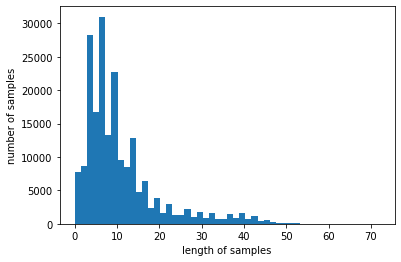

In [48]:
# 리뷰 길이 분포 확인
print('리뷰의 최대 길이 :',max(len(l) for l in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [50]:
from gensim.models import Word2Vec
model = Word2Vec(sentences = tokenized_data, vector_size = 100, window = 5, min_count = 5, workers = 4, sg = 0)

In [51]:
# 완성된 임베딩 매트릭스의 크기 확인
model.wv.vectors.shape

(16477, 100)

In [52]:
print(model.wv.most_similar("최민식"))

[('안성기', 0.8701127767562866), ('김명민', 0.8492439985275269), ('이정재', 0.845390796661377), ('한석규', 0.8448023200035095), ('최민수', 0.8404057621955872), ('이민호', 0.8295879364013672), ('송강호', 0.826976478099823), ('설경구', 0.8252208828926086), ('윤제문', 0.8193737268447876), ('최강희', 0.8165295124053955)]


In [53]:
print(model.wv.most_similar("히어로"))

[('슬래셔', 0.8664607405662537), ('무협', 0.8553155064582825), ('호러', 0.8494916558265686), ('느와르', 0.8340486288070679), ('물의', 0.8133607506752014), ('블랙', 0.8088431358337402), ('로코', 0.8041133284568787), ('무비', 0.7988369464874268), ('블록버스터', 0.7937726974487305), ('물', 0.7919616103172302)]


## 3.3 한국어 Word2Vec 만들기(위키피디아)

이번에는 위키피디아 한국어 덤프 파일을 다운받아서 한국어로 Word2Vec을 직접 진행해보겠습니다. 영어와 크게 다른 점은 없지만 한국어는 형태소 토큰화를 해야만 좋은 성능을 얻을 수 있습니다. 간단히 말해 형태소 분석기를 사용합니다.



### 3.3.1) 위키피디아 한국어 덤프 파일 다운로드


![python_image2](https://wikidocs.net/images/page/22660/bz2.PNG)

위 링크에는 많은 위키피디아 덤프 파일들이 존재합니다. 그 중에서 사용할 데이터는 kowiki-latest-pages-articles.xml.bz2 파일입니다. 해당 파일은 xml 파일므로, Word2Vec을 원활하게 진행하기 위해 파일 형식을 변환해줄 필요가 있습니다.



### 3.3.2) 위키피디아 익스트랙터 다운로드
해당 파일을 모두 다운로드 받았다면 위키피디아 덤프 파일을 텍스트 형식으로 변환시켜주는 오픈소스인 '위키피디아 익스트랙터'를 사용할 것입니다. '위키피디아 익스트랙터'를 다운로드 받기 위해서는 윈도우의 명령 프롬프트나 MAC과 리눅스의 터미널에서 아래의 git clone 명령어를 통해 다운로드 받을 수 있습니다.

git clone "https://github.com/attardi/wikiextractor.git"  


### 3.3.3) 위키피디아 한국어 덤프 파일 변환
위키피디아 익스트랙터와 위키피디아 한국어 덤프 파일을 동일한 디렉토리 경로에 두고, 아래 명령어를 실행하면 위키피디아 덤프 파일이 텍스트 파일로 변환됩니다. 컴퓨터마다 다르지만 보통 10분 내외의 시간이 걸립니다.

여기서부터 오류나서 진행 못함